(192, 263, 3)


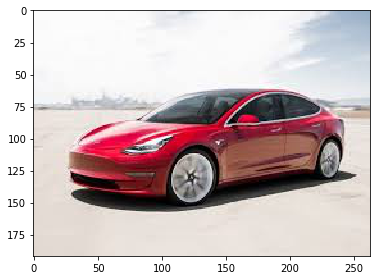

In [2]:
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
%matplotlib inline

image_color = imread('car.jpeg', as_gray=False)
print(image_color.shape)
imshow(image_color)

In [3]:
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa

ia.seed(1)

-1.6670036
141.02979


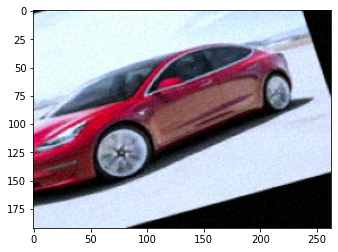

170.86992645263672
129.07745


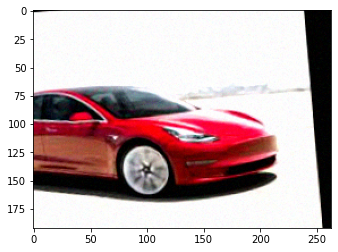

175.98175048828125
146.03218


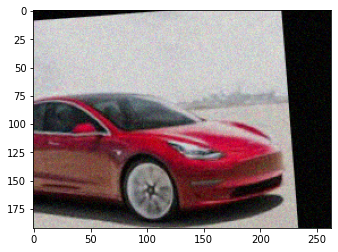

239.3574275970459
112.50664


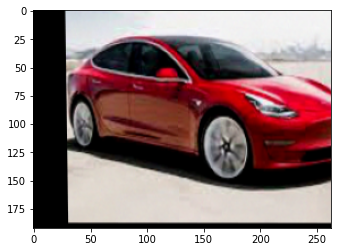

30.137497
119.42035


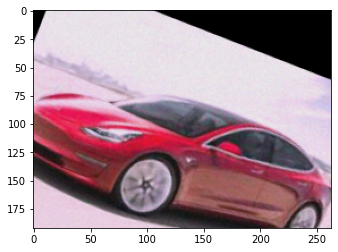

196.05388
156.67572


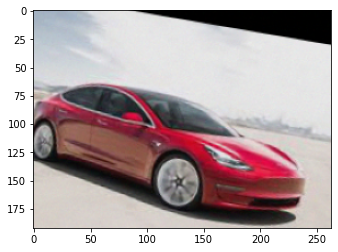

-9.538424
80.022125


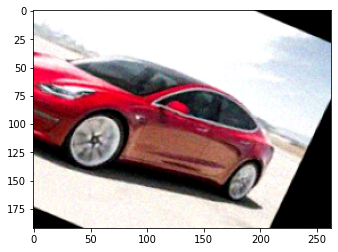

253.36865
113.94232


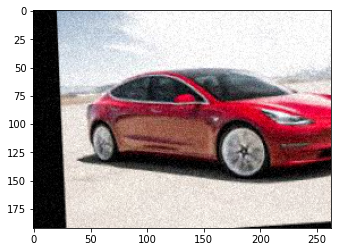

94.49855
114.94716


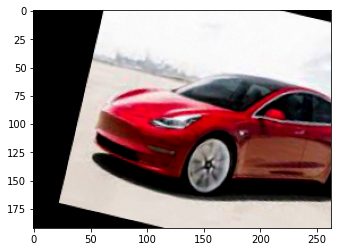

218.05704
154.90048


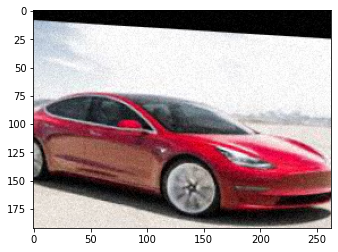

153.05957
138.2467


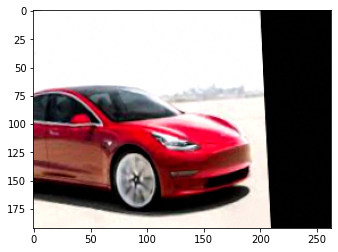

42.86586
123.823616


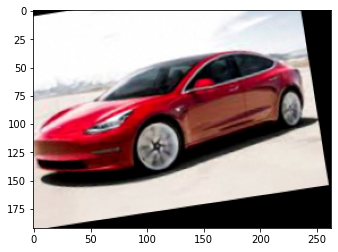

260.1872
98.36291


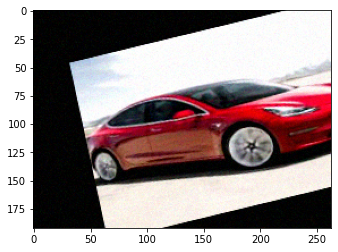

178.5804
107.40809


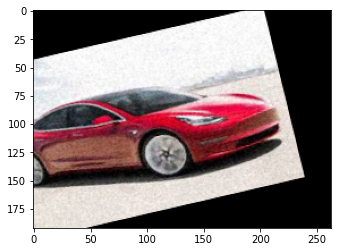

181.49933
111.22087


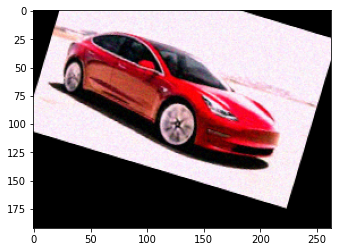

35.884663
109.69862


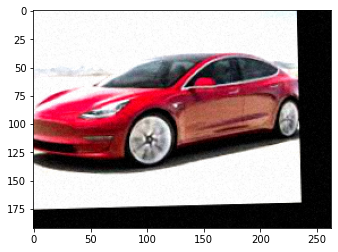

104.896355
121.402916


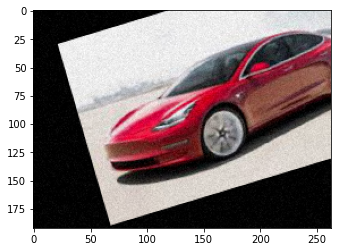

179.31949
141.2214


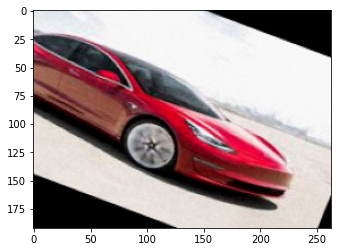

222.32182693481445
117.305855


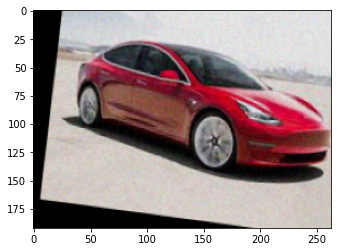

83.23298
119.98059


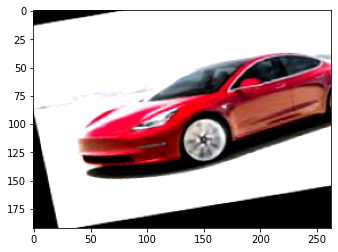

95.29584
102.4723


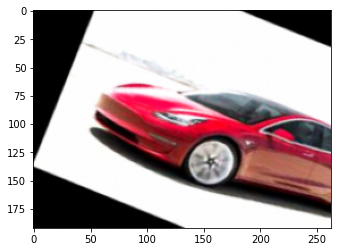

120.14595
98.78409


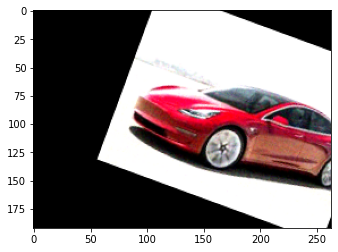

190.6874
177.6339


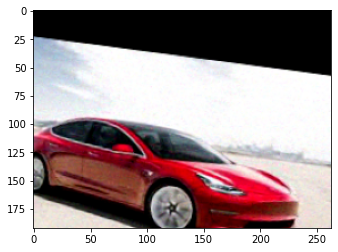

117.48695373535156
158.75583


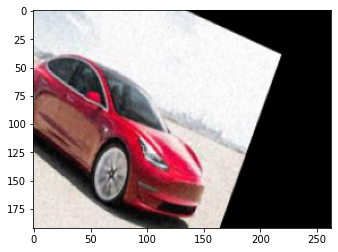

29.86696
116.70167


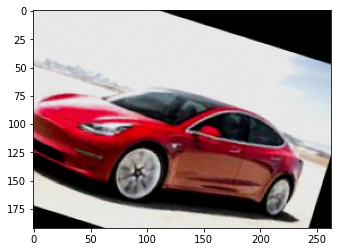

238.4569
114.987144


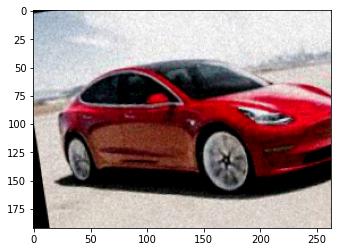

271.00262
117.675446


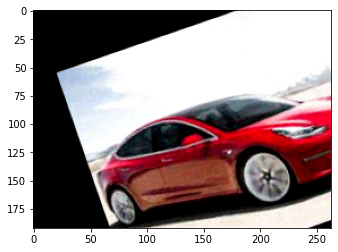

258.9820075035095
103.2108


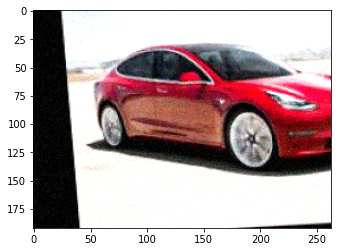

112.84993
117.5074


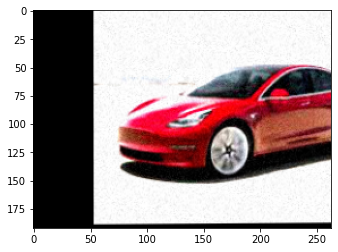

77.306046
151.13177


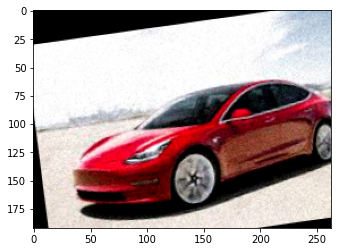

175.1711
117.17096


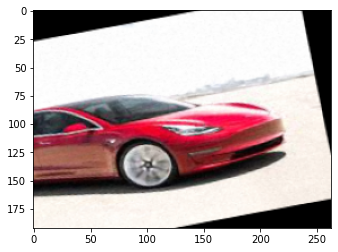

233.95583
91.14397


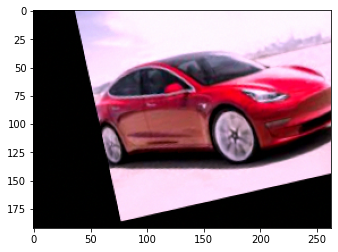

43.22109
175.02733


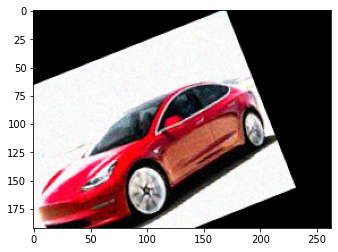

50.505116
123.35731


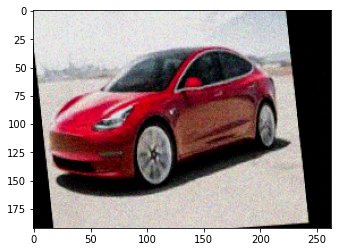

51.329117
143.94048


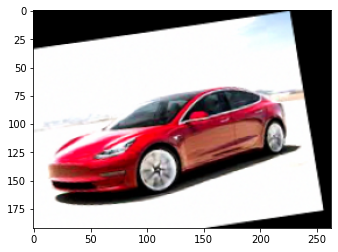

193.44585
130.90501


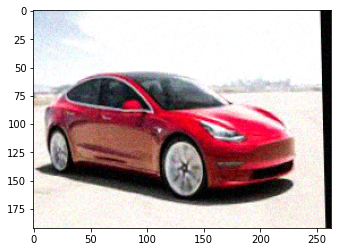

10.396913
113.00223


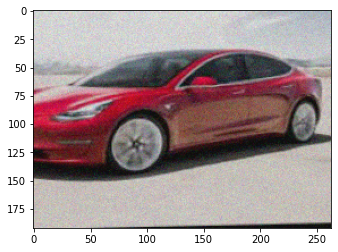

86.12547
164.38933


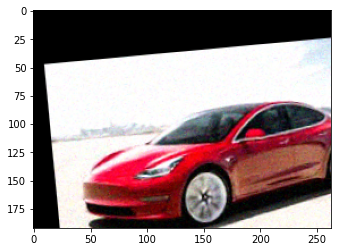

234.90989875793457
82.071335


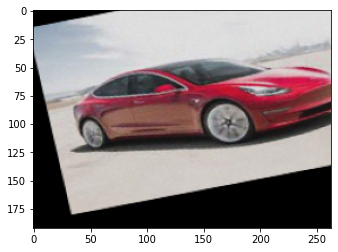

4.5803194
76.63108


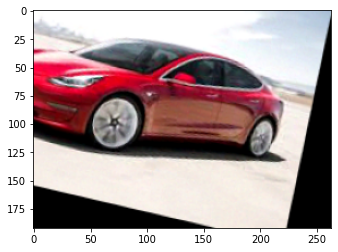

64.280235
177.18027


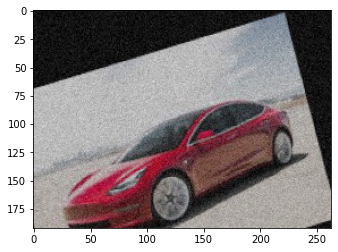

11.146193
145.02524


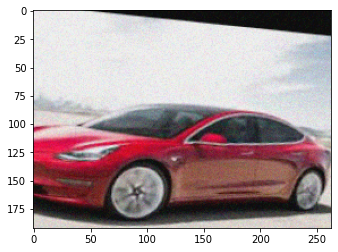

207.50797653198242
152.84944


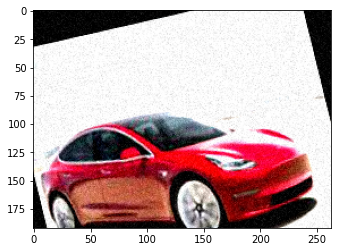

236.68582
113.473206


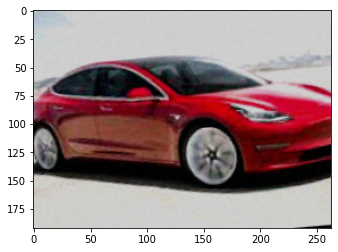

60.16363
125.37456


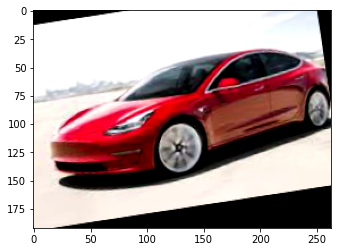

126.36746
141.18253


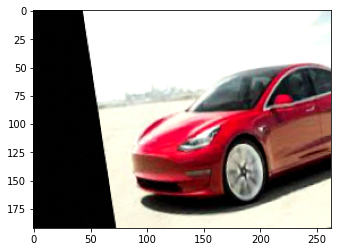

212.57675
109.92011


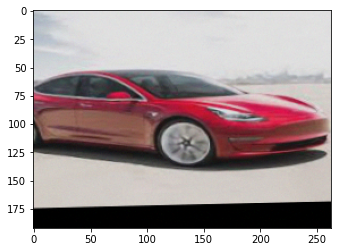

225.51657485961914
91.20076


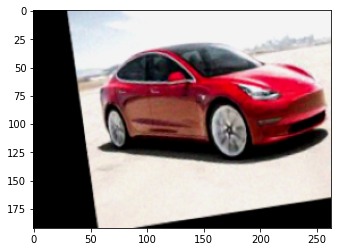

239.08821
134.51215


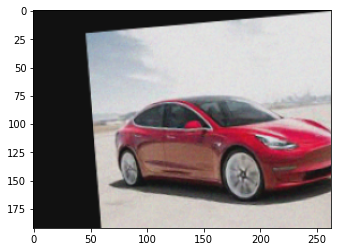

31.50838
35.30311


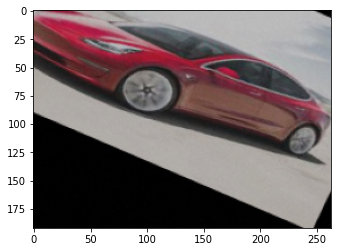

255.83623
105.71059


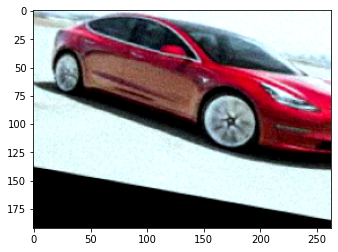

268.6729
150.69174


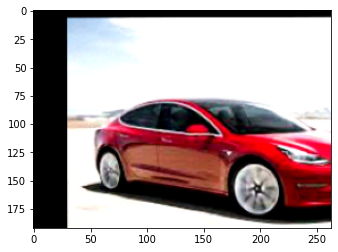

67.87639
113.40326


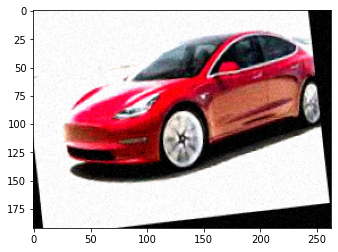

233.40988
162.93608


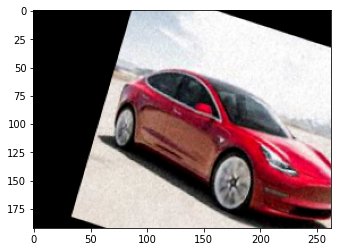

245.70377
128.54436


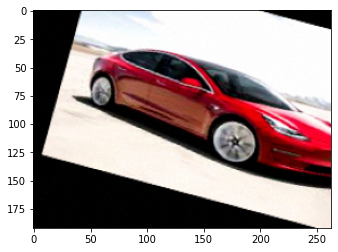

96.75724
187.10966


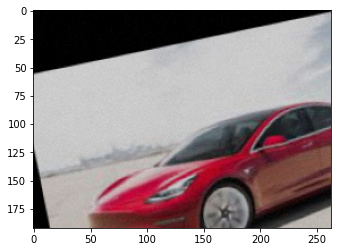

19.995213
163.87318


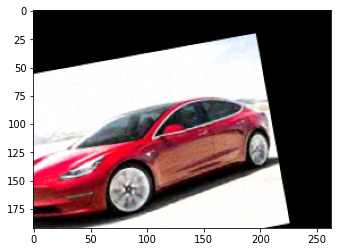

191.81000518798828
158.0589


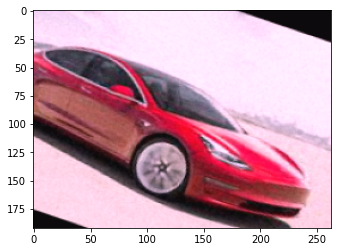

224.39857
140.74847


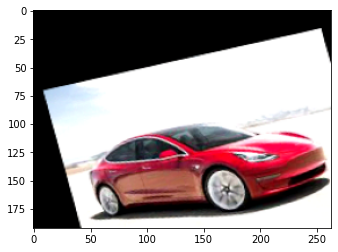

248.44412
145.97833


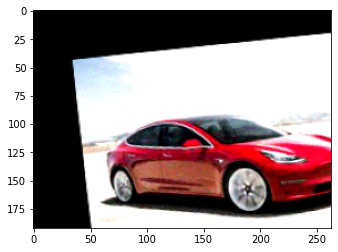

181.87524
107.224594


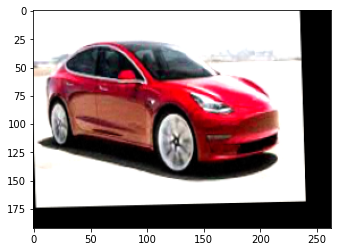

46.295055
94.08678


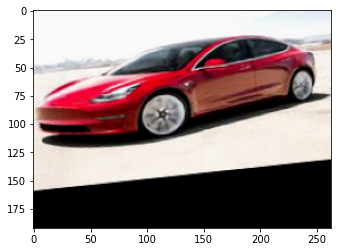

251.83627
120.280106


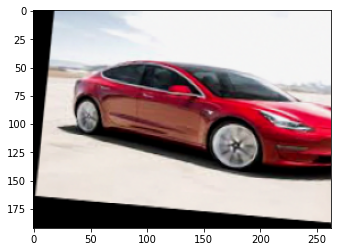

208.19592666625977
168.37892


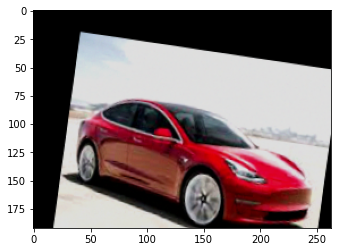

64


In [4]:
# Example batch of images.
# The array has shape (32, 64, 64, 3) and dtype uint8.
x_a = 65
y_a = 125
from imgaug.augmentables import Keypoint, KeypointsOnImage
kps_anchor = [Keypoint(x=x_a,y=y_a)]
kpsoi = KeypointsOnImage(kps_anchor,image_color.shape)
images = np.array(
    [image_color for _ in range(64)],
    dtype=np.uint8
)

seq = iaa.Sequential([
    iaa.Fliplr(0.5), # horizontal flips
    iaa.Crop(percent=(0, 0.1)), # random crops
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    iaa.Sometimes(
        0.5,
        iaa.GaussianBlur(sigma=(0, 0.5))
    ),
    # Strengthen or weaken the contrast in each image.
    iaa.LinearContrast((0.75, 1.5)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    iaa.Multiply((0.8, 1.2), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-25, 25),
        shear=(-8, 8)
    )
], random_order=True) # apply augmenters in random order

images_aug = []
after_xs = []
after_ys = []
dict = {}
for i in range(64):
    image_aug, kpsoi_aug = seq(image=images[i], keypoints=kps_anchor)
    kpsoi_aug2 = KeypointsOnImage(kpsoi_aug,image_aug.shape)
    kpsoi_aug_pos_img = kpsoi_aug2.draw_on_image(image_aug, size=5)
    before = kpsoi.keypoints[0]
    after = kpsoi_aug2.keypoints[0]
    after_x = after.x
    after_y = after.y
    print(after_x)
    print(after_y)
    after_xs.append(after.x)
    after_ys.append(after.y)
    images_aug.append(image_aug)
    plt.imshow(image_aug)
    plt.show()
print(len(images_aug))

In [5]:
print(after_xs)
print(len(after_xs))
print(after_ys)
print(len(after_ys))

[-1.6670036, 170.86992645263672, 175.98175048828125, 239.3574275970459, 30.137497, 196.05388, -9.538424, 253.36865, 94.49855, 218.05704, 153.05957, 42.86586, 260.1872, 178.5804, 181.49933, 35.884663, 104.896355, 179.31949, 222.32182693481445, 83.23298, 95.29584, 120.14595, 190.6874, 117.48695373535156, 29.86696, 238.4569, 271.00262, 258.9820075035095, 112.84993, 77.306046, 175.1711, 233.95583, 43.22109, 50.505116, 51.329117, 193.44585, 10.396913, 86.12547, 234.90989875793457, 4.5803194, 64.280235, 11.146193, 207.50797653198242, 236.68582, 60.16363, 126.36746, 212.57675, 225.51657485961914, 239.08821, 31.50838, 255.83623, 268.6729, 67.87639, 233.40988, 245.70377, 96.75724, 19.995213, 191.81000518798828, 224.39857, 248.44412, 181.87524, 46.295055, 251.83627, 208.19592666625977]
64
[141.02979, 129.07745, 146.03218, 112.50664, 119.42035, 156.67572, 80.022125, 113.94232, 114.94716, 154.90048, 138.2467, 123.823616, 98.36291, 107.40809, 111.22087, 109.69862, 121.402916, 141.2214, 117.305855, 

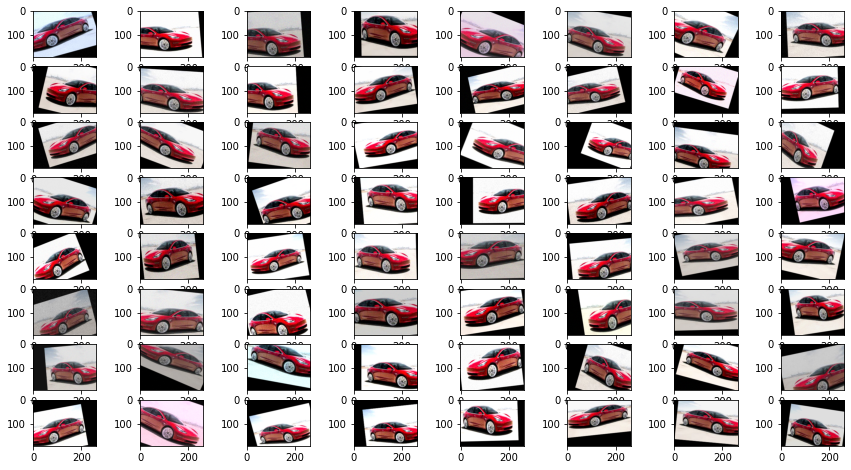

In [6]:
fig = plt.figure(figsize=(15,8))
for i in range(1,65):
    aug_img = images_aug[i-1]
    fig.add_subplot(8,8,i)
    plt.imshow(aug_img)
plt.show()

In [7]:
import random
idx1 = random.sample(range(64),32)
idx2 = []
for i in range(64):
    if i not in idx1:
        idx2.append(i)
print('The indexes of positive {} images'.format(idx1))
print(idx1)
print('The indexes of negative {} images'.format(idx2))
print(idx2)   

The indexes of positive [12, 37, 39, 34, 19, 46, 9, 29, 1, 33, 25, 28, 47, 60, 56, 63, 36, 4, 5, 54, 15, 44, 53, 57, 43, 21, 18, 49, 55, 26, 27, 40] images
[12, 37, 39, 34, 19, 46, 9, 29, 1, 33, 25, 28, 47, 60, 56, 63, 36, 4, 5, 54, 15, 44, 53, 57, 43, 21, 18, 49, 55, 26, 27, 40]
The indexes of negative [0, 2, 3, 6, 7, 8, 10, 11, 13, 14, 16, 17, 20, 22, 23, 24, 30, 31, 32, 35, 38, 41, 42, 45, 48, 50, 51, 52, 58, 59, 61, 62] images
[0, 2, 3, 6, 7, 8, 10, 11, 13, 14, 16, 17, 20, 22, 23, 24, 30, 31, 32, 35, 38, 41, 42, 45, 48, 50, 51, 52, 58, 59, 61, 62]


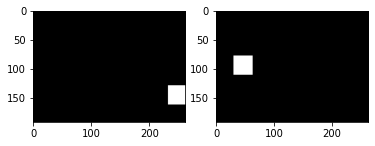

In [18]:
pos_idx = random.sample(range(64),1)
neg_idx = random.sample(range(64),1)
pos_img = images_aug[pos_idx[0]]
neg_img = images_aug[neg_idx[0]]
pos_x_c = after_xs[pos_idx[0]]
pos_y_c = after_ys[pos_idx[0]]
neg_x_c = after_xs[neg_idx[0]]
neg_y_c = after_ys[neg_idx[0]]
x_r = 150
y_r = 85
rect_pos_image = np.zeros((192,263),np.uint8)
cv2.rectangle(rect_pos_image, (int(pos_x_c)-16,int(pos_y_c)+16),(int(pos_x_c)+16,int(pos_y_c)-16),255,-1)
plt.subplot(121)
plt.imshow(rect_pos_image,cmap='gray')
rect_neg_image = np.zeros((192,263),np.uint8)
cv2.rectangle(rect_neg_image, (int(neg_x_c)-16,int(neg_y_c)+16),(int(neg_x_c)+16,int(neg_y_c)-16),255,-1)
plt.subplot(122)
plt.imshow(rect_neg_image,cmap='gray')
plt.show()

# Check the center which is out of range

In [28]:
def check_point(x_c,y_c):
    if x_c>263 or x_c<0 or y_c>192 or y_c<0:
        print('The center is out of range!')
        return 1
    else:
        print('OKK')
        return 0
out_idx = []
for i in range(64):
    print("The {}'s pair transformation".format(i))
    #check_point(after_xs[i],after_ys[i])
    if  check_point(after_xs[i],after_ys[i])==1:
         out_idx.append(i)
print('The index for the image pair to be out of range!')
print(out_idx)

The 0's pair transformation
The center is out of range!
The 1's pair transformation
OKK
The 2's pair transformation
OKK
The 3's pair transformation
OKK
The 4's pair transformation
OKK
The 5's pair transformation
OKK
The 6's pair transformation
The center is out of range!
The 7's pair transformation
OKK
The 8's pair transformation
OKK
The 9's pair transformation
OKK
The 10's pair transformation
OKK
The 11's pair transformation
OKK
The 12's pair transformation
OKK
The 13's pair transformation
OKK
The 14's pair transformation
OKK
The 15's pair transformation
OKK
The 16's pair transformation
OKK
The 17's pair transformation
OKK
The 18's pair transformation
OKK
The 19's pair transformation
OKK
The 20's pair transformation
OKK
The 21's pair transformation
OKK
The 22's pair transformation
OKK
The 23's pair transformation
OKK
The 24's pair transformation
OKK
The 25's pair transformation
OKK
The 26's pair transformation
The center is out of range!
The 27's pair transformation
OKK
The 28's pair 

#  Create the pos  and neg images

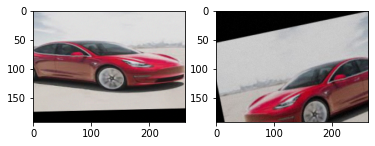

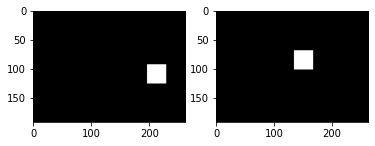

In [21]:
pos_idx = random.sample(range(64),1)
neg_idx = random.sample(range(64),1)
pos_img = images_aug[pos_idx[0]]
neg_img = images_aug[neg_idx[0]]
pos_x_c = after_xs[pos_idx[0]]
pos_y_c = after_ys[pos_idx[0]]
neg_x_c = after_xs[neg_idx[0]]
neg_y_c = after_ys[neg_idx[0]]
plt.figure(1)
plt.subplot(121)
plt.imshow(pos_img)
plt.subplot(122)
plt.imshow(neg_img)
plt.show()
x_r = 150
y_r = 85
rect_pos_image = np.zeros((192,263),np.uint8)
cv2.rectangle(rect_pos_image, (int(pos_x_c)-16,int(pos_y_c)+16),(int(pos_x_c)+16,int(pos_y_c)-16),255,-1)
plt.figure(2)
plt.subplot(121)
plt.imshow(rect_pos_image,cmap='gray')
rect_neg_image = np.zeros((192,263),np.uint8)
cv2.rectangle(rect_neg_image, (int(x_r)-16,int(y_r)+16),(int(x_r)+16,int(y_r)-16),255,-1)
plt.subplot(122)
plt.imshow(rect_neg_image,cmap='gray')
plt.show()

In [30]:
print(rect_pos_image.shape)

(192, 263)


In [31]:
rect_pos_image_2 = rect_pos_image.reshape(192,263,1)
print(rect_pos_image_2.shape)

(192, 263, 1)


## RGB ---> RGBA (4 channels)

In [33]:
result = np.dstack((pos_img,rect_pos_image))
print(result.shape)

(192, 263, 4)


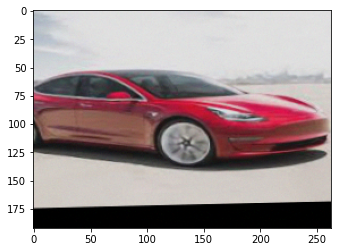

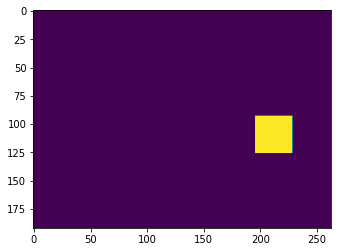

In [38]:
plt.figure(1)
plt.imshow(result[:,:,:3])
plt.figure(2)
plt.imshow(result[:,:,3])
plt.show()

(192, 263, 4)


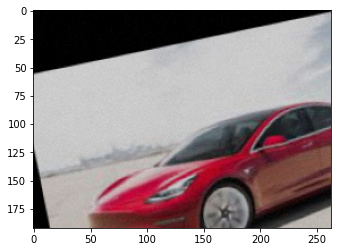

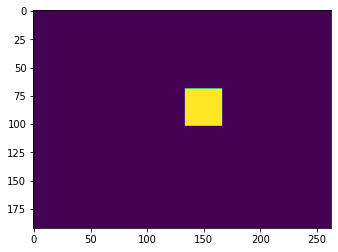

In [53]:
result_2 = np.dstack((neg_img, rect_neg_image))
print(result_2.shape)
plt.figure(1)
plt.imshow(result_2[:,:,:3])
plt.figure(2)
plt.imshow(result_2[:,:,3])
plt.show()

# Original Image with mask

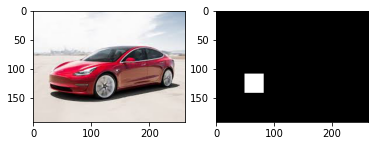

In [55]:
plt.figure()
plt.subplot(121)
plt.imshow(image_color)
x_a = 65
y_a = 125
rect_ori_image = np.zeros((192,263),np.uint8)
cv2.rectangle(rect_ori_image, (x_a-16,y_a+16),(x_a+16,y_a-16),255,-1)
plt.subplot(122)
plt.imshow(rect_ori_image,cmap='gray')
plt.show()

(192, 263, 4)


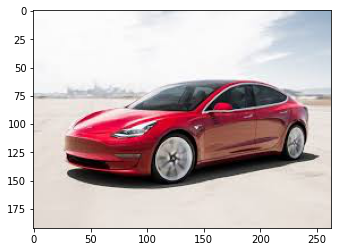

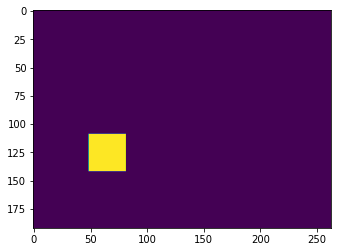

In [56]:
ori_result = np.dstack((image_color, rect_ori_image))
print(ori_result.shape)
plt.figure(1)
plt.imshow(ori_result[:,:,:3])
plt.figure(2)
plt.imshow(ori_result[:,:,3])
plt.show()

# Model architecture

In [41]:
import torch
from torchsummary import summary
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18
from collections import OrderedDict
# defining our deep learning architecture
resnet = resnet18(pretrained=True)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
resnet.conv1 = nn.Conv2d(4, 64, kernel_size=7, stride=2, padding=3, bias=False)
classifier = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(resnet.fc.in_features, 256)),
    ('added_relu1', nn.ReLU(inplace=True)),
    ('fc2', nn.Linear(256, 64)),
    ('added_relu2', nn.ReLU(inplace=True)),
    ('fc3', nn.Linear(64, 128))
]))

resnet.fc = classifier
resnet.to(device)
summary(resnet, (4, 192, 263))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 64, 96, 132]          12,544
       BatchNorm2d-2          [-1, 64, 96, 132]             128
              ReLU-3          [-1, 64, 96, 132]               0
         MaxPool2d-4           [-1, 64, 48, 66]               0
            Conv2d-5           [-1, 64, 48, 66]          36,864
       BatchNorm2d-6           [-1, 64, 48, 66]             128
              ReLU-7           [-1, 64, 48, 66]               0
            Conv2d-8           [-1, 64, 48, 66]          36,864
       BatchNorm2d-9           [-1, 64, 48, 66]             128
             ReLU-10           [-1, 64, 48, 66]               0
       BasicBlock-11           [-1, 64, 48, 66]               0
           Conv2d-12           [-1, 64, 48, 66]          36,864
      BatchNorm2d-13           [-1, 64, 48, 66]             128
             ReLU-14           [-1, 64,

In [47]:
from torchvision import transforms as T
def tensorify(img):
    res = T.ToTensor()(img)
    #res = T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))(res)
    return res
result = tensorify(result)

In [48]:
print(result.shape)

torch.Size([4, 192, 263])


In [62]:
output_pos = resnet(result.reshape(1,4,192,263).to(device))
print(output_pos)

tensor([[-0.1765, -0.0691, -0.1343, -0.1120, -0.0465,  0.0860,  0.0982, -0.1304,
          0.0581, -0.1080,  0.0872,  0.0808,  0.0330, -0.0222, -0.0015, -0.1515,
         -0.0056, -0.1841, -0.0717, -0.0772,  0.1106, -0.0926,  0.2207, -0.0016,
          0.1938, -0.1143,  0.0646,  0.1543,  0.2905, -0.0309, -0.0362,  0.0888,
         -0.1631,  0.1284, -0.1754, -0.0268,  0.0324, -0.1292,  0.0260,  0.1246,
          0.0130,  0.0706,  0.0778, -0.0363,  0.1998, -0.1645, -0.1310,  0.0940,
         -0.0953,  0.0266,  0.1045,  0.0655,  0.0916, -0.0536, -0.0840,  0.0892,
         -0.0367, -0.0454, -0.0656, -0.0198, -0.1183,  0.0925,  0.1129,  0.1882,
         -0.1198, -0.0776,  0.1269,  0.0029,  0.1519,  0.1861,  0.0581, -0.1203,
          0.0814,  0.1405,  0.0259,  0.1574, -0.1457, -0.1314, -0.0887, -0.1349,
         -0.0370, -0.1151,  0.0208,  0.0525,  0.1792,  0.0950, -0.0248, -0.1585,
         -0.1211, -0.0198, -0.0367,  0.1748, -0.2379,  0.2360, -0.0975, -0.1036,
          0.0404, -0.1029, -

In [54]:
result_2 = tensorify(result_2)
output_neg = resnet(result_2.reshape(1,4,192,263).to(device))
print(output_neg)

tensor([[-0.1885, -0.0723, -0.1381, -0.1072, -0.0592,  0.0881,  0.1086, -0.1281,
          0.0551, -0.1121,  0.0808,  0.0646,  0.0309, -0.0203, -0.0025, -0.1524,
         -0.0019, -0.1847, -0.0637, -0.0833,  0.1137, -0.0945,  0.2152,  0.0017,
          0.1929, -0.1162,  0.0586,  0.1562,  0.2851, -0.0412, -0.0382,  0.0922,
         -0.1719,  0.1266, -0.1841, -0.0221,  0.0335, -0.1275,  0.0246,  0.1209,
          0.0154,  0.0804,  0.0751, -0.0363,  0.2008, -0.1717, -0.1306,  0.0904,
         -0.0819,  0.0254,  0.1018,  0.0671,  0.0879, -0.0585, -0.0738,  0.0836,
         -0.0397, -0.0524, -0.0676, -0.0248, -0.1155,  0.0893,  0.1217,  0.1879,
         -0.1210, -0.0829,  0.1288,  0.0034,  0.1527,  0.1823,  0.0654, -0.1261,
          0.0836,  0.1404,  0.0305,  0.1554, -0.1443, -0.1232, -0.0956, -0.1366,
         -0.0298, -0.1188,  0.0228,  0.0542,  0.1757,  0.0821, -0.0169, -0.1536,
         -0.1223, -0.0179, -0.0377,  0.1795, -0.2316,  0.2406, -0.0993, -0.1011,
          0.0350, -0.0953, -

In [59]:
output_ori = resnet(ori_result.reshape(1,4,192,263).to(device))
print(output_ori)

tensor([[-1.7876e-01, -7.6167e-02, -1.3545e-01, -1.1316e-01, -5.1686e-02,
          9.4840e-02,  1.0879e-01, -1.1943e-01,  5.8542e-02, -1.0098e-01,
          8.5577e-02,  6.7842e-02,  3.4272e-02, -2.2361e-02, -1.1727e-02,
         -1.5341e-01,  2.8485e-04, -1.8924e-01, -6.8877e-02, -8.1424e-02,
          1.1380e-01, -1.0419e-01,  2.2099e-01,  1.8651e-03,  1.8931e-01,
         -1.1770e-01,  5.2030e-02,  1.5623e-01,  2.9164e-01, -3.5600e-02,
         -3.9081e-02,  9.3988e-02, -1.6960e-01,  1.2955e-01, -1.7977e-01,
         -2.1747e-02,  3.7439e-02, -1.2310e-01,  2.4020e-02,  1.1808e-01,
          1.5717e-02,  6.4571e-02,  7.5089e-02, -4.4642e-02,  1.9053e-01,
         -1.7333e-01, -1.2176e-01,  1.0381e-01, -8.8030e-02,  2.7697e-02,
          1.0762e-01,  7.6120e-02,  8.4148e-02, -5.5475e-02, -8.5259e-02,
          8.2484e-02, -3.2736e-02, -5.3924e-02, -7.5335e-02, -3.1845e-02,
         -1.2014e-01,  9.3235e-02,  1.2845e-01,  1.8554e-01, -1.1936e-01,
         -7.6505e-02,  1.2766e-01,  3.

# NT-Xent Loss

In [60]:
# Code for NT-Xent Loss function, explained in more detail in the article

tau = 0.05

def loss_function(a, b):
    a_norm = torch.norm(a, dim=1).reshape(-1, 1)
    a_cap = torch.div(a, a_norm)
    b_norm = torch.norm(b, dim=1).reshape(-1, 1)
    b_cap = torch.div(b, b_norm)
    a_cap_b_cap = torch.cat([a_cap, b_cap], dim=0)
    a_cap_b_cap_transpose = torch.t(a_cap_b_cap)
    b_cap_a_cap = torch.cat([b_cap, a_cap], dim=0)
    sim = torch.mm(a_cap_b_cap, a_cap_b_cap_transpose)
    sim_by_tau = torch.div(sim, tau)
    exp_sim_by_tau = torch.exp(sim_by_tau)
    sum_of_rows = torch.sum(exp_sim_by_tau, dim=1)
    exp_sim_by_tau_diag = torch.diag(exp_sim_by_tau)
    numerators = torch.exp(torch.div(torch.nn.CosineSimilarity()(a_cap_b_cap, b_cap_a_cap), tau))
    denominators = sum_of_rows - exp_sim_by_tau_diag
    num_by_den = torch.div(numerators, denominators)
    neglog_num_by_den = -torch.log(num_by_den)
    return torch.mean(neglog_num_by_den)

In [63]:
ori_emb = output_ori
neg_emb = output_neg
pos_emb = output_pos
NT_loss_anc_pos = loss_function(ori_emb, pos_emb)
NT_loss_anc_neg = loss_function(ori_emb, neg_emb)
NT_loss_pos_neg = loss_function(pos_emb, neg_emb)
print('NT_loss between anchor & positive')
print(NT_loss_anc_pos)
print('NT_loss between anchor & negative')
print(NT_loss_anc_neg)

NT_loss between anchor & positive
tensor(-1.8477e-06, device='cuda:0', grad_fn=<MeanBackward0>)
NT_loss between anchor & negative
tensor(1.9670e-06, device='cuda:0', grad_fn=<MeanBackward0>)
